In [19]:
import numpy as np
import scipy as sp
import pandas as pd
from subprocess import check_output

import time, json
from datetime import date

import time
import math
import sklearn.preprocessing as prep
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

In [20]:
df= pd.read_csv('groupeddf.csv')
df4=df.set_index("Code")

In [21]:
uniqueVals = df["Code"].unique()  


In [22]:
uniqueVals

array(['3IINFOTECH', '8KMILES', 'ABAN', 'ABB', 'ABBOTINDIA', 'ABIRLANUVO',
       'ACC', 'ADANIENT', 'ADANIPORTS', 'ADANIPOWER', 'AHMEDFORGE',
       'AIAENG', 'AIL', 'AJANTPHARM', 'AKZOINDIA', 'ALBK', 'ALEMBICLTD',
       'ALLCARGO', 'ALOKTEXT', 'AMARAJABAT', 'AMBUJACEM', 'AMTEKAUTO',
       'AMTEKINDIA', 'ANANTRAJ', 'ANDHRABANK', 'APLLTD', 'APOLLOHOSP',
       'APOLLOTYRE', 'ARCOTECH', 'ARVIND', 'ARVINDREM', 'ASHOKA',
       'ASHOKLEY', 'ASIANPAINT', 'ASTRAL', 'ASTRAMICRO', 'ATFL',
       'ATULAUTO', 'AURIONPRO', 'AUROPHARMA', 'AXISBANK', 'AXISCADES',
       'BAJAJCORP', 'BAJAJELEC', 'BAJAJFINSV', 'BAJAJHIND', 'BAJAJHLDNG',
       'BAJFINANCE', 'BALKRISIND', 'BALMLAWRIE', 'BALRAMCHIN',
       'BANKBARODA', 'BANKINDIA', 'BATAINDIA', 'BAYERCROP', 'BBL', 'BBTC',
       'BEL', 'BEML', 'BERGEPAINT', 'BFUTILITIE', 'BGRENERGY',
       'BHARATFORG', 'BHARTIARTL', 'BHEL', 'BIOCON', 'BLUEDART',
       'BOMDYEING', 'BOSCHLTD', 'BPCL', 'BPL', 'BRITANNIA', 'CADILAHC',
       'CAIRN', 'CANBK', 'CA

In [23]:
#'3IINFOTECH', '8KMILES', 'ABAN'

#df1=grouped_df.loc["8KMILES",:]
df1=df.loc[df['Code'] == "8KMILES"]
df2=df1.reset_index()
label=df2['Date'].values.tolist()
trainset=df2['Open'].values.tolist()
df2

,index,Code,Date,Open,High,Low,Close,Volume
0,158,8KMILES,2014-12-18,561.963918,562.615636,561.317698,562.008419,148.219931
1,159,8KMILES,2014-12-19,588.985235,589.995805,588.078859,589.031208,335.969799
2,160,8KMILES,2014-12-22,603.079123,603.608772,602.417544,603.047193,169.870175
3,161,8KMILES,2014-12-23,600.358528,600.876254,599.931438,600.357692,97.444816
4,162,8KMILES,2014-12-24,588.538106,589.038987,588.018722,588.531498,117.449339
...,...,...,...,...,...,...,...,...
178,336,8KMILES,2015-09-24,1425.896581,1426.803205,1425.048077,1425.834615,85.448718
179,337,8KMILES,2015-09-28,1413.101322,1413.839868,1412.314537,1412.951322,71.374449
180,338,8KMILES,2015-09-29,1383.679461,1384.679253,1382.544606,1383.513900,82.506224
181,339,8KMILES,2015-09-30,1400.488693,1400.946985,1399.891960,1400.346734,54.628141


In [24]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error

In [25]:
def create_dataset(dataset,past=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-past-1):
        j = dataset[i:(i+past), 0]
        dataX.append(j)
        dataY.append(dataset[i + past, 0])
        #print(j,dataset[i + past, 0])
    #print(np.array(dataX), np.array(dataY))
    return np.array(dataX), np.array(dataY)

In [26]:
from sklearn.preprocessing import MinMaxScaler
def testandtrain(prices):
    scaler = MinMaxScaler(feature_range=(0, 1))
    prices = scaler.fit_transform(prices)
    trainsize = int(len(prices) * 0.80)
    testsize = len(prices) - trainsize
    train, test = prices[0:trainsize,:], prices[trainsize:len(prices),:]
    #print(len(train), len(test))
    
    x_train,y_train = create_dataset(train,1)
    x_test,y_test = create_dataset(test,1)
    
    #x_train = scaler.fit_transform(x_train)
    #x_test = scaler.fit_transform(x_test)
    #y_test =scaler.fit_transform(y_test)
    #y_train=scaler.fit_transform(y_train)
    return x_train,y_train, x_test,y_test





In [27]:
prices = df2['Close'].values.astype('float32') 
prices = prices.reshape(len(prices), 1)
prices.shape



(183, 1)

In [28]:
trainX, trainY, testX, testY=testandtrain(prices)

In [29]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
regr = linear_model.LinearRegression()
regr.fit(trainX, trainY)
test= regr.predict(testX)


In [30]:
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(test,testY))

0.060035257147528547

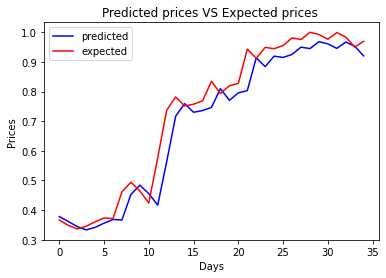

In [38]:
plt.plot(test,color="blue",label='predicted')
plt.plot(testY,color='red',label='expected')
plt.xlabel("Days")
plt.ylabel("Prices")
plt.legend(loc=0)
plt.title('Predicted prices VS Expected prices ')
plt.show()

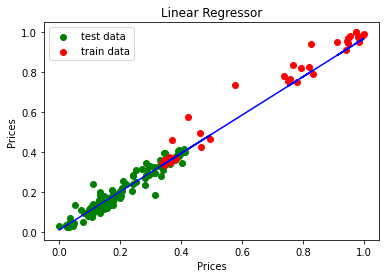

In [37]:
plt.scatter(trainX,trainY,color='green',label='test data')
plt.scatter(testX,testY,color='red',label='train data')
plt.plot(testX,regr.predict(testX),color='blue',)
plt.plot(trainX,regr.predict(trainX),color='blue')
plt.legend(loc=0)
plt.xlabel("Prices")
plt.ylabel("Prices")
plt.title('Linear Regressor')
plt.show()